## Reducción de dimensión
- La reducción de dimensión es un problema que se usa principalmente para visualizar datos.
- A menudo, los datos que se van a analizar tienen muchas dimensiones, lo que los hace complejos y dificulta su interpretación.
- Resulta útil poder ver la distribución de los datos para la toma de desiciones, como por ejemplo elegir un buen número de clusters.

### Usos

Al reducir la dimensión se obtienen las siguientes ventajas:

- Se usa menos memoria para almacenar datos.
- Al usar menos memoria, se aprovechan las velocidades de la [jerarquía de memoria](https://es.wikipedia.org/wiki/Jerarqu%C3%ADa_de_memoria#:~:text=La%20jerarqu%C3%ADa%20de%20memoria%20es,de%20la%20jerarqu%C3%ADa%20de%20memoria.) aumentando el rendimiento de los algoritmos.
- Se logra que los datos no tengan una correlación lineal
 entre ellos.
- Aprende una transformación ortogonal que alinea las direcciones
 de máxima varianza de los datos con los ejes.
 




## Análisis de componentes principales

- El algoritmo de Análisis de Componentes Principales (PCA) aplica una tranformación lineal para reducir la dimensión perdiendo la menor información posible. 

- El algoritmo de PCA asume que los datos estén centrados en cero y tengan una desviación estandar de 1. La implementación que usaremos es de sklearn, que centra los datos en cero pero no los reescala, para eso se debe usar el parámetro `whiten`.


## Ejemplo de alineación de ejes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml


Primero creamos un conjunto de datos y le aplicamos una transformación lineal para centrar los datos en el punto $(2,2)$ y estirar un eje y comprimir el otro. Al final tenemos los datos como se muestra en la figura.

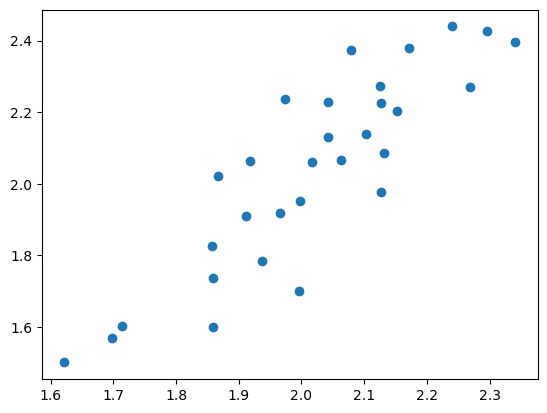

In [3]:
np.random.seed(0)
X = np.random.rand(30, 2) - [0.5, 0.5]
A = [[.4, .5], [.2, 1]]
X = np.array([np.matmul(A, x) for x in X] + np.array([2,2]))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Luego aplicamos PCA con el mismo número de dimensiones (dos) para que los datos los tengamos centrados en el origen y los ejes balanceados. Con el método `fit` se calcula la transformación que se le debe aplicar a los datos. Con el método `tranform` se aplica la tranformación.

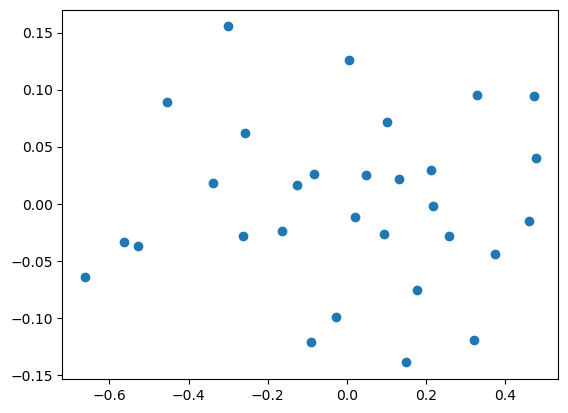

In [4]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_t = pca.transform(X)
plt.scatter(X_t[:, 0], X_t[:, 1])
plt.show()

> **_Actividad:_** Modifique los datos iniciales y compare los resultados.

## Ejemplo de reducción de dimensión

Aquí leemos el conjunto de datos MNIST. Consiste en imágenes de 28x28 pixeles de números escritos a mano. La variable $y$ indica la clase (número deo 0 al 9).

In [5]:
mnist = fetch_openml('mnist_784', as_frame=False)

X = mnist.data
y = mnist.target.astype(np.uint8)

X.shape, y.shape

((70000, 784), (70000,))

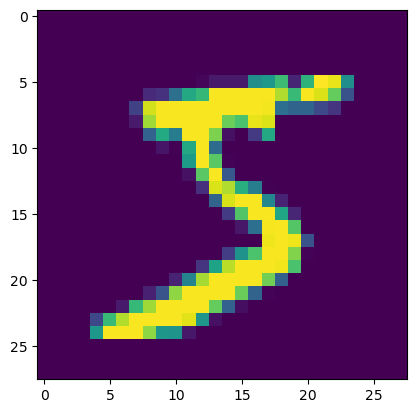

In [6]:
plt.imshow(X[0].reshape((28,28)))
plt.show()

Se escalan los datos para que estén centrados en cero y varianza 1. Usamos `StandardScaler` para estandarizar los datos. Aplicamos el método `fit_tranform` para modificar los datos.

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
np.mean(X_scaled), np.std(X_scaled)

(np.float64(-1.2072825732320548e-18), np.float64(0.9576491198422799))

Aplicamos PCA para reducir a 3 dimensiones y graficamos los puntos.

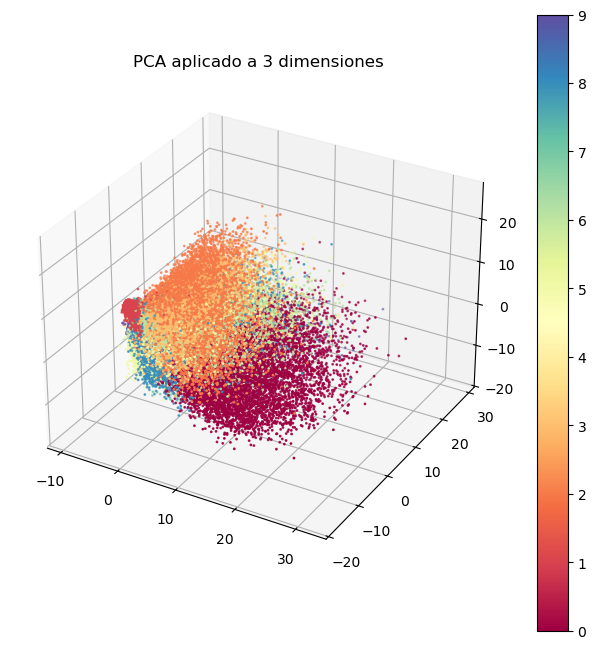

In [8]:
pca = decomposition.PCA(n_components=3)
pca.fit(X_scaled)
X_t = pca.transform(X_scaled)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
im = ax.scatter(X_t[:,0], X_t[:,1], X_t[:,2], c=y, s=1, cmap='Spectral')
ax.set_title("PCA aplicado a 3 dimensiones")
fig.colorbar(im, ax=ax)
plt.show()

- Después de aplicar el método PCA a los datos, podemos ver que las diferentes clases están muy revueltas.
- Podemos revisar el porcentaje de varianza explicada por cada una de las dimensiones finales. Esto lo podemos ver en el método `explained_variance_ratio_`. 

In [9]:
print(pca.explained_variance_ratio_)
print("Varianza retenida después de reducir dimensiones:", 
      np.sum(pca.explained_variance_ratio_))

[0.05642719 0.04041226 0.03738273]
Varianza retenida después de reducir dimensiones: 0.13422218110268314


Ahora veamos cómo quedan los datos usando reducción a dos dimensiones.

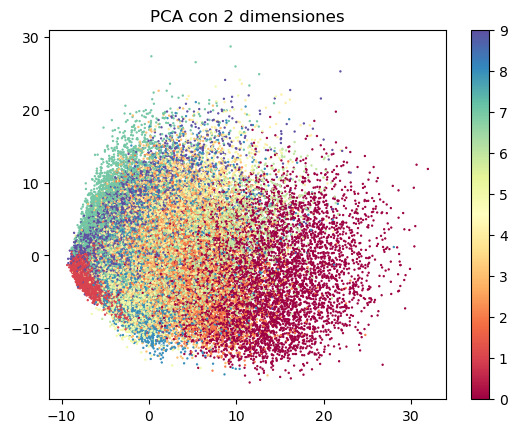

In [16]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)
X_t = pca.transform(X_scaled)
plt.scatter(X_t[:, 0], X_t[:, 1], c=y, cmap='Spectral', s=.5)
plt.title("PCA con 2 dimensiones")
plt.colorbar()
plt.show()

Revisamos la varianza retenida

In [11]:
print(pca.explained_variance_ratio_)
print("Varianza retenida después de reducir dimensiones:", 
      np.sum(pca.explained_variance_ratio_))

[0.05642719 0.04041226]
Varianza retenida después de reducir dimensiones: 0.0968394477878165


Como podemos ver, la varianza retenida es muy pequeña. Veamos cómo se modifica si usamos 100 dimensiones.

In [12]:
pca = decomposition.PCA(n_components=100)
pca.fit(X_scaled)
X_t = pca.transform(X_scaled)
print(pca.explained_variance_ratio_)
print("Varianza retenida después de reducir dimensiones:", 
      np.sum(pca.explained_variance_ratio_))

[0.05642719 0.04041226 0.03738273 0.02893    0.02520752 0.02192549
 0.01914282 0.01740684 0.01532232 0.01396087 0.01342175 0.01201421
 0.01113962 0.01090582 0.01027986 0.00994955 0.00931255 0.00919635
 0.008886   0.00863195 0.00821741 0.00798417 0.00762573 0.00742315
 0.0071657  0.00689314 0.00681399 0.00654588 0.00627293 0.00610345
 0.00597261 0.00589304 0.00567358 0.00559358 0.00552473 0.00534443
 0.00527593 0.00515841 0.00505498 0.00477438 0.00476312 0.00465155
 0.00453454 0.00445757 0.00442313 0.00437877 0.00437294 0.00427724
 0.00424808 0.00418524 0.00404059 0.00396258 0.00393176 0.00390562
 0.00386444 0.00377501 0.00373883 0.00368328 0.00360377 0.0035637
 0.00349289 0.00344527 0.00343239 0.00341    0.00334463 0.00332107
 0.00329803 0.00319433 0.0031711  0.00315431 0.00309941 0.00305782
 0.00305095 0.0030396  0.00296635 0.00292958 0.00291295 0.00290232
 0.00288608 0.00287022 0.00284514 0.00281524 0.00279245 0.00278629
 0.00278233 0.00276733 0.0027542  0.00272901 0.0026874  0.00268

## UMAP

- UMAP es una técnica que busca una reducción de la dimensión tomando en cuenta la estructura global de los datos.
- El algoritmo usa la topología para obtener la estructura de los datos.
- Toma el grafo de los vecinos cercanos para obtener las vecindades de cada punto.

El parámetro `n_neighbors` controla el número de vecinos que se tomarán para formar el grafo $G$.

Otro parámetro que vamos a variar es `min_dist` que dice la mínima distancia para considerar los cluster.

In [13]:
import umap

C:\Users\msubr\Anaconda3\envs\c_ansyv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Aplicamos UMAP para reducir a 2 dimensiones variando el número de vecinos de 3, 5 y 20.

C:\Users\msubr\Anaconda3\envs\c_ansyv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\msubr\Anaconda3\envs\c_ansyv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


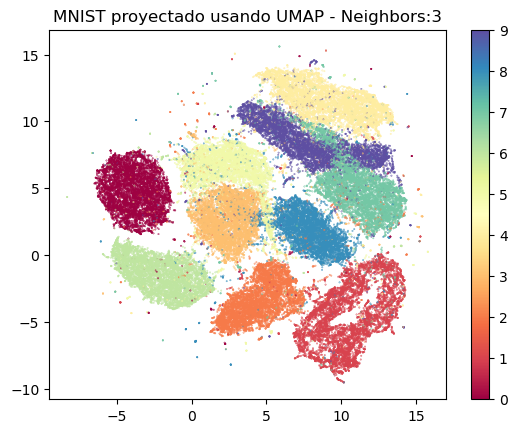

C:\Users\msubr\Anaconda3\envs\c_ansyv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


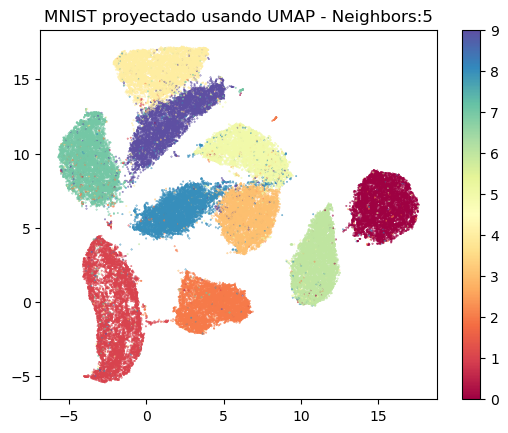

C:\Users\msubr\Anaconda3\envs\c_ansyv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


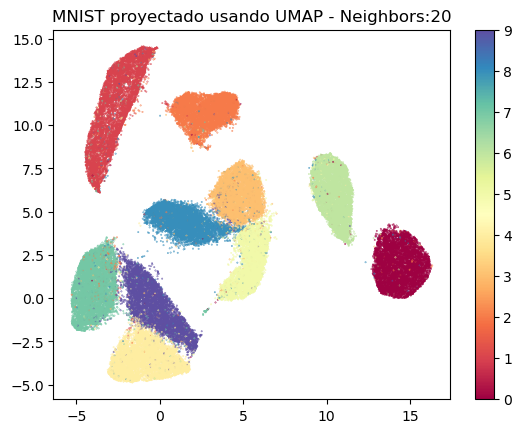

In [14]:
neighbors = [3, 5, 20]
for neig in neighbors:
    reducer = umap.UMAP(n_components=2, n_neighbors=neig, min_dist=.2)
    embedding = reducer.fit_transform(X)
    plt.scatter(embedding[:, 0],
            embedding[:, 1],
            c=y,
            s=0.1,
            cmap='Spectral')
    plt.colorbar()
    plt.title(f"MNIST proyectado usando UMAP - Neighbors:{neig}")
    plt.show()

Ahora variamos el parámetro `min_dist` para ver su efecto.

C:\Users\msubr\Anaconda3\envs\c_ansyv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


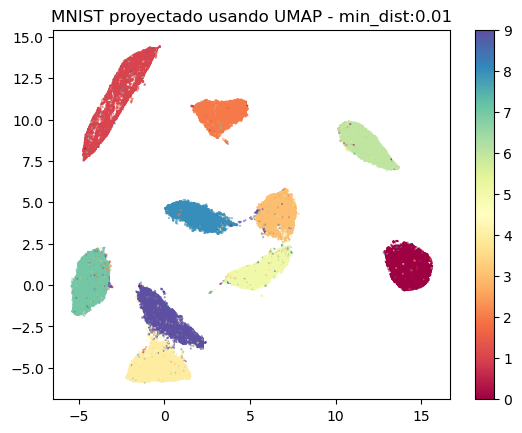

C:\Users\msubr\Anaconda3\envs\c_ansyv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


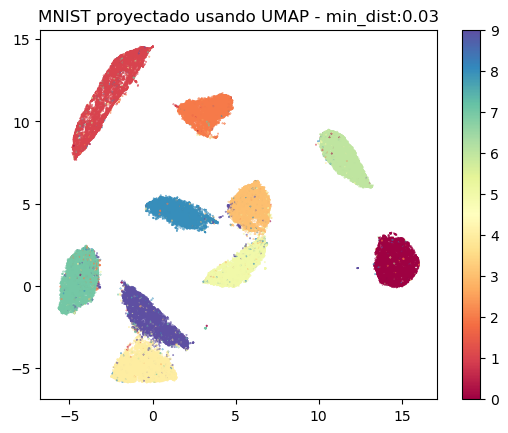

C:\Users\msubr\Anaconda3\envs\c_ansyv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


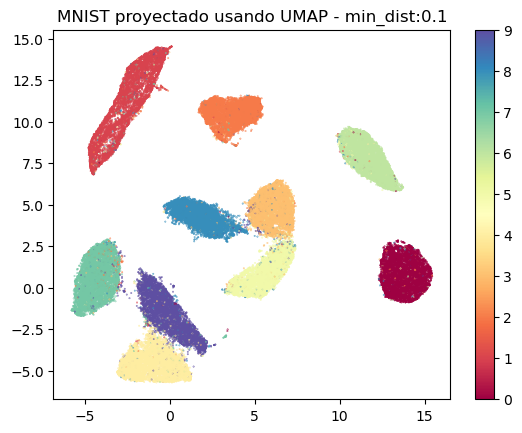

C:\Users\msubr\Anaconda3\envs\c_ansyv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


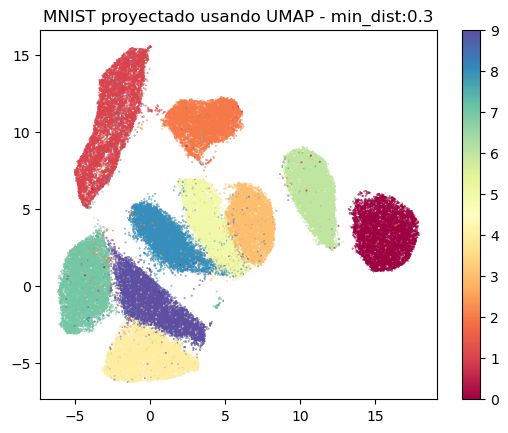

C:\Users\msubr\Anaconda3\envs\c_ansyv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


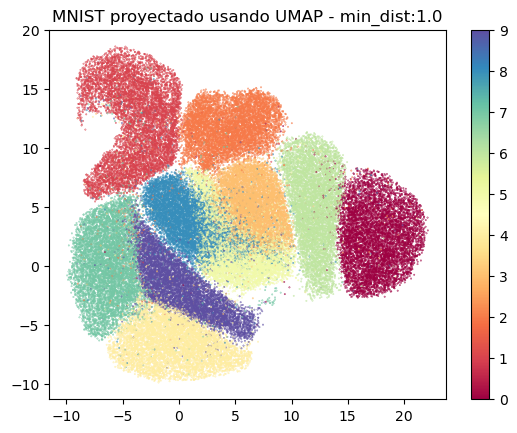

In [15]:
min_dist = [0.01, 0.03, 0.1, 0.3, 1.0]
for d in min_dist:
    reducer = umap.UMAP(n_components=2, n_neighbors=10, min_dist=d)
    embedding = reducer.fit_transform(X)
    plt.scatter(embedding[:, 0],
            embedding[:, 1],
            c=y,
            s=0.1,
            cmap='Spectral')
    plt.colorbar()
    plt.title(f"MNIST proyectado usando UMAP - min_dist:{d}")
    plt.show()